In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [230]:
def ucb(T, K):
#     mus = np.random.uniform(0,1,K)
    mus = [0.3, 0.5]
    mu_hats = []
    loss_arr = []
    arms = []
    for i in range(0,K):
        mu_hats.append(np.random.binomial(1, mus[i]))
        loss_arr.append(mu_hats[i])
        arms.append(i)
    loss = np.sum(mu_hats)
    mu_sampled = np.ones(K)
    for i in range(K,T):
        arm = np.argmin(mu_hats-np.sqrt(np.divide(2*np.log(i),mu_sampled)))
        arms.append(arm)
        sample = np.random.binomial(1, mus[arm])
        loss_arr.append(sample)
        loss += sample
        mu_hats[arm] = (mu_hats[arm]*mu_sampled[arm]+sample)/(mu_sampled[arm]+1)
        mu_sampled[arm] += 1
    emin_loss = np.min(mus)*T
    return(loss, emin_loss, mus, mu_hats, loss_arr, np.max(mus)-np.min(mus), arms)

def ucb_adv(T, K, C):
#     mus = np.random.uniform(0.2,1,K)
    mus = np.multiply(0.3,np.ones(K))
    mus[0] = 0.1
    mu_hats = []
    loss_arr = []
    arms = []
    for i in range(0,K):
        mu_hats.append(np.random.binomial(1, mus[i])+np.sqrt(1/mus[i]))
        loss_arr.append(mu_hats[i])
        arms.append(i)
    loss = np.sum(mu_hats)
    mu_sampled = np.ones(K)
    for i in range(K,T):
        arm = np.argmin(mu_hats-np.sqrt(np.divide(2*np.log(i),mu_sampled)))
        arms.append(arm)
        sample = np.random.binomial(1, mus[arm])
        if(i < C):
            print('tricked you!')
            sample += 0.5/mus[arm]
        loss_arr.append(sample)
        loss += sample
        mu_hats[arm] = (mu_hats[arm]*mu_sampled[arm]+sample)/(mu_sampled[arm]+1)
        mu_sampled[arm] += 1
    emin_loss = np.min(mus)*T
    return(loss, emin_loss, mus, mu_hats, loss_arr, np.max(mus)-np.min(mus), arms)

In [138]:
loss, emin_loss, mus, mu_hats, loss_arr, delta_max = ucb(1000, 2)
loss4, emin_loss4, mus4, mu_hats4, loss_arr4, delta_max4 = ucb(1000, 4)
loss6, emin_loss6, mus6, mu_hats6, loss_arr6, delta_max6 = ucb(1000, 6)
loss8, emin_loss8, mus8, mu_hats8, loss_arr8, delta_max8 = ucb(1000, 8)

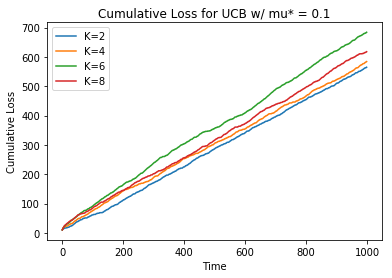

In [190]:
# plt.plot(np.subtract(np.cumsum(loss_arr),emin_loss/1000*np.cumsum(np.ones(1000))))
plt.plot(np.cumsum(loss_arr), label='K=2')
plt.plot(np.cumsum(loss_arr4), label='K=4')
plt.plot(np.cumsum(loss_arr6), label='K=6')
plt.plot(np.cumsum(loss_arr8), label='K=8')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Cumulative Loss')
plt.title('Cumulative Loss for UCB w/ mu* = 0.1')
plt.show()


In [236]:
loss, emin_loss, mus, mu_hats, loss_arr, delta_max, arms = ucb_adv(1000, 2, 0)
loss4, emin_loss4, mus4, mu_hats4, loss_arr4, delta_max4, arms4 = ucb_adv(1000, 4, 0)
loss6, emin_loss6, mus6, mu_hats6, loss_arr6, delta_max6, arms6 = ucb_adv(1000, 6, 0)
# loss8, emin_loss8, mus8, mu_hats8, loss_arr8, delta_max8, arms8 = ucb_adv(1000, 8, 0)

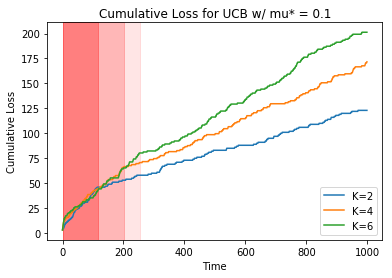

In [244]:
# plt.plot(np.subtract(np.cumsum(loss_arr),emin_loss/1000*np.cumsum(np.ones(1000))))
plt.plot(np.cumsum(loss_arr), label='K=2')
plt.plot(np.cumsum(loss_arr4), label='K=4')
plt.plot(np.cumsum(loss_arr6), label='K=6')
plt.axvspan(0, 115, alpha=0.3, color='red')
plt.axvspan(0, 203, alpha=0.2, color='red')
plt.axvspan(0, 253, alpha=0.1, color='red')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Cumulative Loss')
plt.title('Cumulative Loss for UCB w/ mu* = 0.1')
plt.show()